In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv('../datasets/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
X=data.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y=data.iloc[:,-1]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [7]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
#feature engineering (handling categorical data)
Gen = pd.get_dummies(X['Gender'],drop_first=True)
Geo = pd.get_dummies(X['Geography'],drop_first=True)

In [9]:
#adding the featured columns
X=pd.concat([X,Gen,Geo],axis=1)
X.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
4508,599,France,Female,41,1,0.00,2,1,0,96069.82,False,False,False
5573,681,France,Male,29,8,0.00,1,1,0,66367.33,True,False,False
7941,592,Germany,Male,33,2,156570.86,1,1,1,37140.20,True,True,False
6930,751,France,Male,30,3,165257.20,1,0,0,134822.05,True,False,False
5800,599,France,Male,30,9,105443.68,1,1,1,121124.53,True,False,False


In [10]:
X.drop(['Gender','Geography'],axis=1,inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(8000, 11)

In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.91324755,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]])

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ( accuracy_score, confusion_matrix, precision_score, recall_score, 
                    f1_score, roc_auc_score, classification_report )

In [30]:
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=200)
nb =  GaussianNB()
rf = RandomForestClassifier()
svc = SVC(probability=True)
grb = GradientBoostingClassifier()

In [37]:
def model_tr_eval(model,clf):
    model.fit(X_train, y_train)
    
    print(f'Model Name: {clf}')
    #training
    y_pred_tr = model.predict(X_train)
    print(f'Model training accuarcy : {accuracy_score(y_train,y_pred_tr):.3f}')
    #testing
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print(f'Model testing accuarcy : {accuracy_score(y_test,y_pred):.3f}')
    
    #label to use in evaluation
    lbl = ['low','med', 'high']
    
    #evaluating scores
    try:
        print(f'Precision : {precision_score(y_test,y_pred, average="weighted"):.3f}')
        print(f'Recall : {recall_score(y_test,y_pred,average="weighted"):.3f}')
        print(f'F1 score : {f1_score(y_test,y_pred, average="weighted"):.3f}')
        print(f'Roc_auc score : {roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class="ovr"):.3f}')
    except ValueError as e:
        print(f'Error in metrics calculation: {e}')

    #report and confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    sns.heatmap(cm, annot=True, cmap='YlGnBu', linewidths=1, xticklabels=lbl, 
                yticklabels=lbl, square=True, cbar_kws={'shrink': 0.8} ,ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    #error plot 
    sns.kdeplot(y_test - y_pred, ax=ax[1])
    ax[1].set_title('Error Distribution')

    plt.tight_layout()
    plt.show()
    
     # Metrics
    train_acc = accuracy_score(y_train, y_pred_tr)
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class="ovr")
    
    return train_acc, test_acc, precision, recall, f1, roc_auc

In [38]:
def results_to_df(models):
    results = []
    
    for name, clf in models.items():
        train_acc, test_acc, precision, recall, f1, roc_auc = model_tr_eval(clf, name)
        results.append({
            'Model': name,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc
        })
    
    results_df = pd.DataFrame(results)
    return results_df

Model Name: KNN
Model training accuarcy : 0.874
Model testing accuarcy : 0.830
Precision : 0.811
Recall : 0.830
F1 score : 0.813
Roc_auc score : 0.760


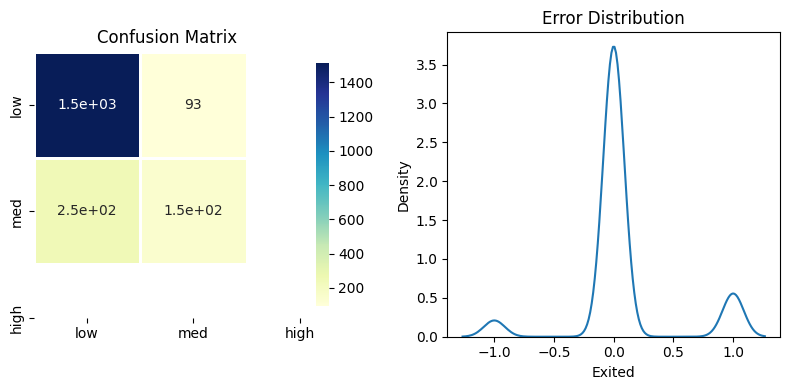

Model Name: Logistic Regression
Model training accuarcy : 0.811
Model testing accuarcy : 0.811
Precision : 0.776
Recall : 0.811
F1 score : 0.774
Roc_auc score : 0.779


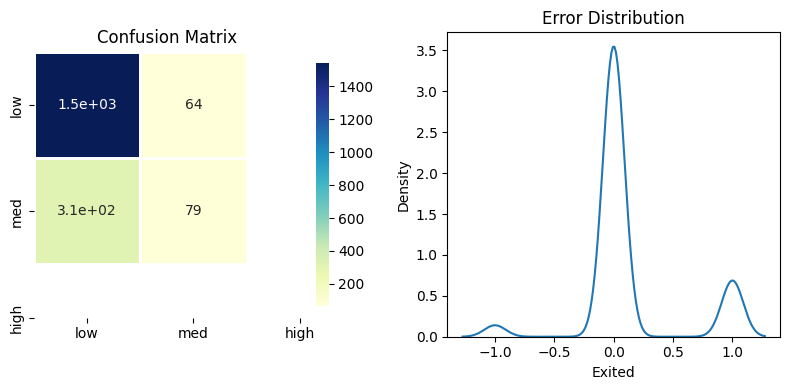

Model Name: Random Forest
Model training accuarcy : 1.000
Model testing accuarcy : 0.864
Precision : 0.854
Recall : 0.864
F1 score : 0.852
Roc_auc score : 0.857


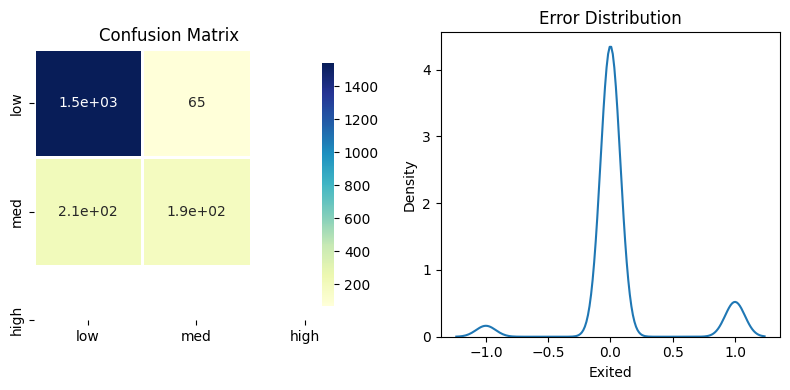

Model Name: Naive Bayes
Model training accuarcy : 0.824
Model testing accuarcy : 0.834
Precision : 0.814
Recall : 0.834
F1 score : 0.815
Roc_auc score : 0.804


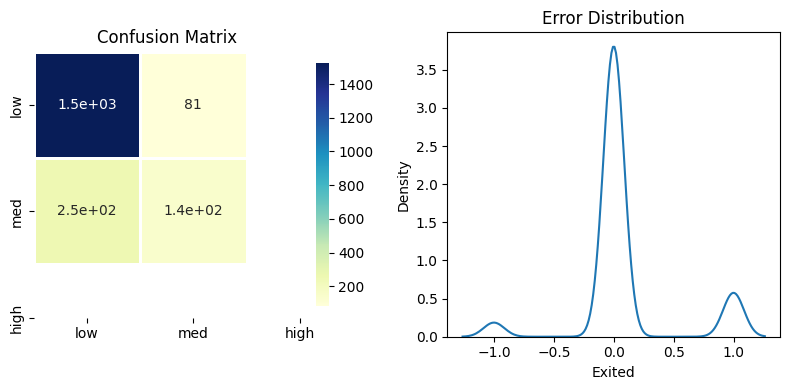

Model Name: SVC
Model training accuarcy : 0.865
Model testing accuarcy : 0.856
Precision : 0.846
Recall : 0.856
F1 score : 0.836
Roc_auc score : 0.825


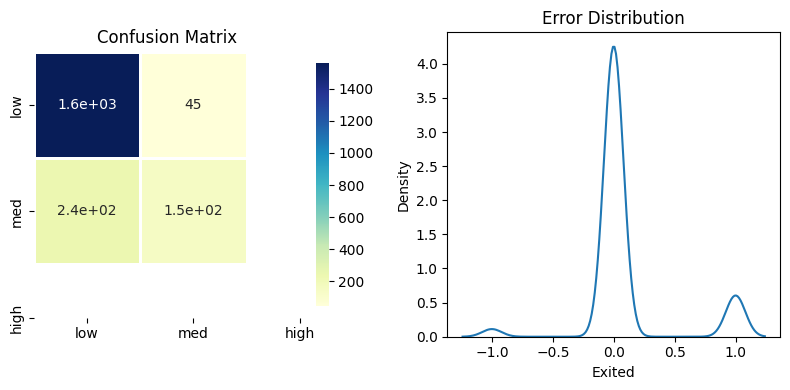

Model Name: Gradient Boosting
Model training accuarcy : 0.873
Model testing accuarcy : 0.868
Precision : 0.858
Recall : 0.868
F1 score : 0.856
Roc_auc score : 0.873


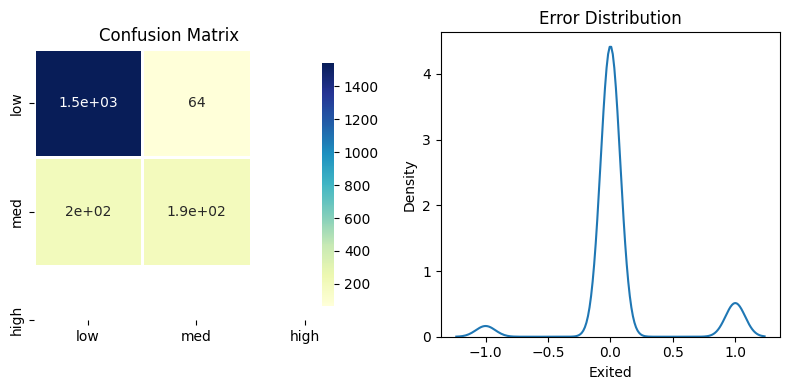

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
0,KNN,0.874125,0.8300,0.810838,0.8300,0.813175,0.760429
1,Logistic Regression,0.811375,0.8110,0.776192,0.8110,0.773744,0.778900
2,Random Forest,1.000000,0.8640,0.854017,0.8640,0.851883,0.857235
3,Naive Bayes,0.823750,0.8335,0.814422,0.8335,0.814558,0.804437
4,SVC,0.865375,0.8560,0.846482,0.8560,0.835933,0.824739
5,Gradient Boosting,0.872875,0.8675,0.858270,0.8675,0.856224,0.872930


In [39]:
models={
    'KNN': knn,
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Naive Bayes': nb,
    'SVC': svc,
    'Gradient Boosting': grb
}
results_to_df(models)

In [17]:
clf=Sequential()
#Adding the input layer
clf.add(Dense(22,activation='relu', input_dim=11))
# clf.add(Dropout(0.2))

#two hidden layers
clf.add(Dense(44,activation='relu'))
# clf.add(Dropout(0.3))

clf.add(Dense(20,activation='relu'))
# clf.add(Dropout(0.3))

#Adding the output layer
clf.add(Dense(1,activation='sigmoid'))

In [18]:
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,CSVLogger

early=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=5,verbose=1,restore_best_weights=True)


In [19]:
hist = clf.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=40)

Epoch 1/40
400/400 [==============================] - 2s 3ms/step - loss: 0.4723 - accuracy: 0.8009 - val_loss: 0.4073 - val_accuracy: 0.8344
Epoch 2/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8458 - val_loss: 0.3652 - val_accuracy: 0.8450
Epoch 3/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.8544 - val_loss: 0.3587 - val_accuracy: 0.8569
Epoch 4/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8597 - val_loss: 0.3507 - val_accuracy: 0.8537
Epoch 5/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8609 - val_loss: 0.3526 - val_accuracy: 0.8562
Epoch 6/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8612 - val_loss: 0.3462 - val_accuracy: 0.8537
Epoch 7/40
400/400 [==============================] - 1s 3ms/step - loss: 0.3326 - accuracy: 0.8622 - val_loss: 0.3472 - val_accuracy: 0.8438
Epoch 

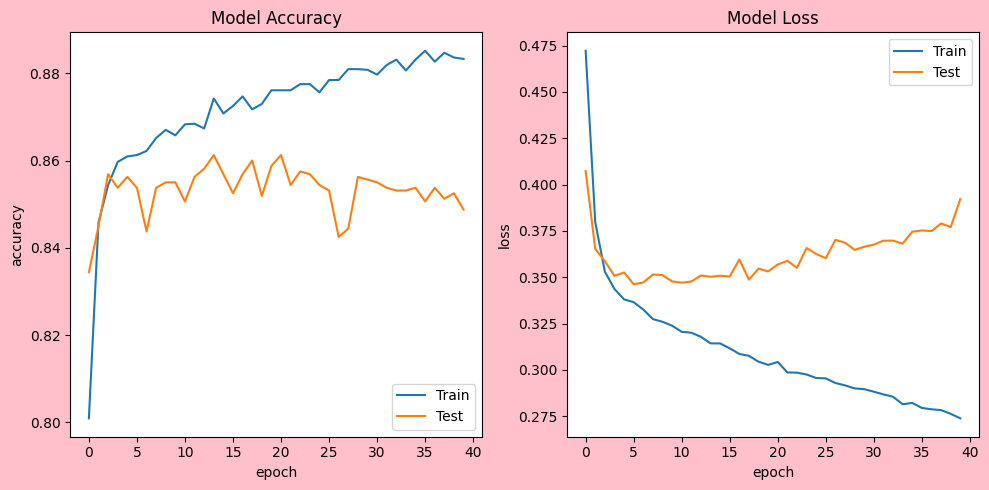

In [20]:
plt.figure(figsize=(10,5),facecolor='pink') # width and height in inches
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='lower right')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')

plt.tight_layout()
plt.show()

In [21]:
y_prob=clf.predict(X_test)
y_pred=(y_prob>=0.5)

63/63 [==============================] - 0s 1ms/step


In [22]:
cf=confusion_matrix(y_pred,y_test)
acc=accuracy_score(y_pred,y_test)

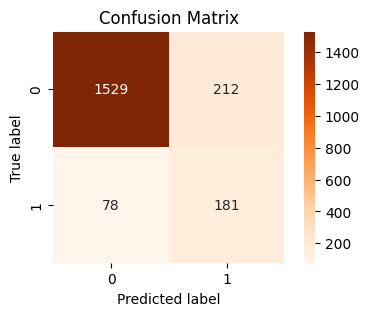

In [26]:
import seaborn as sns
# Plotting with seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cf, annot=True, fmt="d", cmap="Oranges", square=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
acc

0.855

In [28]:
clf.layers[3].get_weights()

[array([[-0.2448985 ],
        [ 0.8373222 ],
        [-0.6360768 ],
        [ 0.68041474],
        [-0.41063637],
        [-0.7636722 ],
        [-0.5621809 ],
        [ 0.49066284],
        [ 1.0408331 ],
        [-0.370829  ],
        [ 0.83429366],
        [-0.15507762],
        [-0.9185572 ],
        [-0.54135126],
        [ 1.1653074 ],
        [-0.72991586],
        [-0.39227825],
        [ 0.46684712],
        [-1.1476094 ],
        [ 1.098628  ]], dtype=float32),
 array([0.04459308], dtype=float32)]